# Visão geral

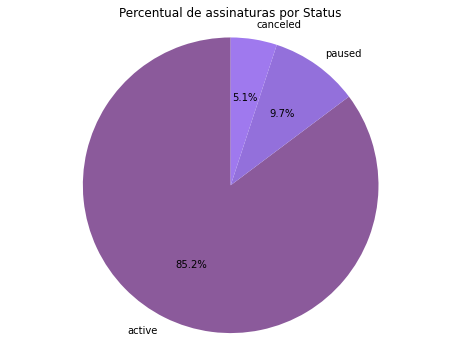

<ipython-input-13-32bf31495bf3>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_canceled['deleted_month'] = df_canceled['deleted_at'].dt.to_period('M')
<ipython-input-13-32bf31495bf3>:54: RuntimeWarning: invalid value encountered in longlong_scalars
  churn_rate = (canceled_count / active_count) * 100


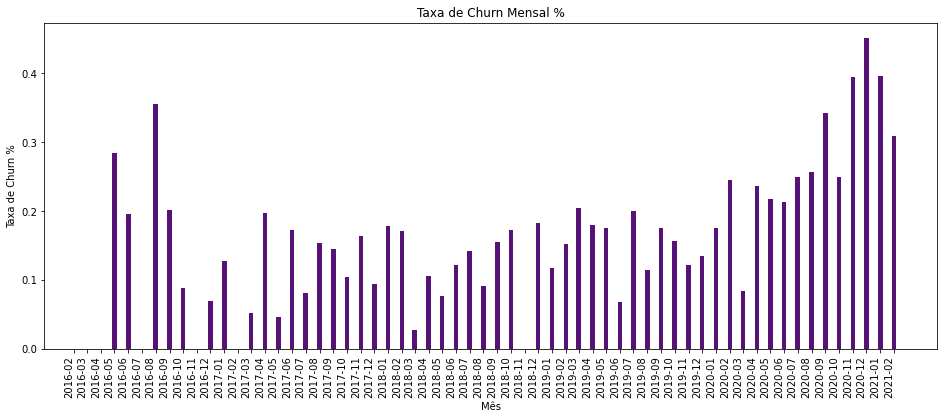

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


def read_data(filename):
    df = pd.read_csv(filename)
    return df


def filter_canceled(df):
    df_canceled = df[df['status'] == 'canceled']
    return df_canceled
    
def clean_data(df):
    df['created_at'] = pd.to_datetime(df['created_at'], format='%m/%d/%y %I:%M %p')
    df['deleted_at'] = pd.to_datetime(df['deleted_at'], format='%m/%d/%y %I:%M %p')
    df['birth_date'] = pd.to_datetime(df['birth_date'], format='%m/%d/%y %I:%M %p')
    df['last_date_purchase'] = pd.to_datetime(df['last_date_purchase'], format='%m/%d/%y %I:%M %p')

    df['created_at'] = df['created_at'].apply(lambda x: x.replace(year=2000 + x.year % 100))
    df['deleted_at'] = df['deleted_at'].apply(lambda x: x.replace(year=2000 + x.year % 100))
    df['birth_date'] = df['birth_date'].apply(lambda x: x.replace(year=1900 + x.year % 100))
    df['last_date_purchase'] = df['last_date_purchase'].apply(lambda x: x.replace(year=2000 + x.year % 100))

    return df

def convert_csv_to_df(filename):
    df = read_data(filename)    
    return df

def calculate_total_active_subscribers_monthly(df):
    df['created_month'] = df['created_at'].dt.to_period('M')
    df['deleted_month'] = df['deleted_at'].dt.to_period('M')

    active_subscribers = pd.DataFrame()
    

    for i, month in enumerate(df['created_month'].unique()):
        total = len(df[(df['created_month'] < month) & ((df['deleted_month'] > month) | (df['status'] == 'active'))])
        new_row = pd.DataFrame([[str(month), total]], columns=['Month', 'total_active_subscribers'])
        active_subscribers = pd.concat([active_subscribers, new_row], ignore_index=True)
        
    return active_subscribers


def calculate_monthly_churn(df_canceled, total_active_subscribers_monthly):
    monthly_churn = pd.DataFrame()
    df_canceled['deleted_month'] = df_canceled['deleted_at'].dt.to_period('M')

    for i, month in enumerate(total_active_subscribers_monthly['Month']):
        canceled_count = len(df_canceled[df_canceled['deleted_month'] == month])
        active_count = total_active_subscribers_monthly.loc[i, 'total_active_subscribers']
        churn_rate = (canceled_count / active_count) * 100 

        new_row = pd.DataFrame([[str(month), churn_rate, canceled_count, active_count]], columns=['Month', 'Churn Rate', 'canceled', 'active'])
        monthly_churn = pd.concat([monthly_churn, new_row], ignore_index=True)


    return monthly_churn
def plot_monthly_churn(churn_rate):
    churn_rate['Month'] = pd.to_datetime(churn_rate['Month'], format='%Y-%m')
    churn_rate = churn_rate.sort_values('Month')  # Ordenar pelos meses

    plt.figure(figsize=(16, 6))
    plt.bar(churn_rate['Month'], churn_rate['Churn Rate'], color='#571277', width=10)

    plt.xlabel('Mês')
    plt.ylabel('Taxa de Churn %')
    plt.title('Taxa de Churn Mensal %')
    plt.xticks(churn_rate['Month'], rotation=90, ha='right')  # Exibir todos os nomes dos meses
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato de data (ano-mês)
    plt.show()



def plot_churn_by_status(df):
    status_counts = df['status'].value_counts()
    
    # Definição dos tons de roxo
    colors = ['#8B5A9B', '#9370DB', '#9F79EE', '#A58AC7']
    
    # Criação do gráfico de pizza com os tons de roxo
    plt.figure(figsize=(8, 6))
    plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    plt.axis('equal') 
    plt.title('Percentual de assinaturas por Status')
    
    plt.show()


# Lendo e convertendo os dados
filename = 'data-test-analytics_5.csv'
df = convert_csv_to_df(filename)
df = clean_data(df)

# Filtrando os cancelamentos
df_canceled = filter_canceled(df)

#visao geral
plot_churn_by_status(df)

# Calcular o total de assinantes ativos mensais
total_active_subscribers_monthly = calculate_total_active_subscribers_monthly(df)

# Calcular o churn rate mensal
monthly_churn = calculate_monthly_churn(df_canceled, total_active_subscribers_monthly)


# Plotar o churn rate mensal
plot_monthly_churn(monthly_churn)




# Tempo entre o cancelamento e a última compra

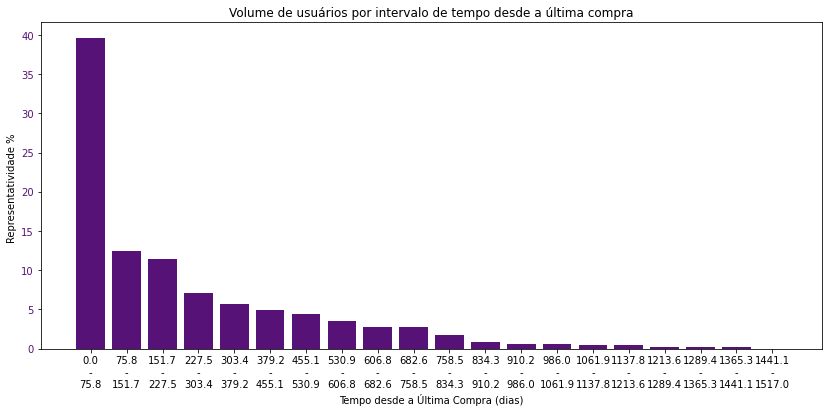

0.0\n-\n75.8         39.603960
75.8\n-\n151.7       12.475248
151.7\n-\n227.5      11.485149
227.5\n-\n303.4       7.128713
303.4\n-\n379.2       5.742574
379.2\n-\n455.1       4.950495
455.1\n-\n530.9       4.356436
606.8\n-\n682.6       3.564356
530.9\n-\n606.8       2.772277
682.6\n-\n758.5       2.772277
758.5\n-\n834.3       1.782178
910.2\n-\n986.0       0.792079
834.3\n-\n910.2       0.594059
1137.8\n-\n1213.6     0.594059
1365.3\n-\n1441.1     0.396040
1441.1\n-\n1517.0     0.396040
1061.9\n-\n1137.8     0.198020
1213.6\n-\n1289.4     0.198020
1289.4\n-\n1365.3     0.198020
986.0\n-\n1061.9      0.000000
Name: time_range, dtype: float64


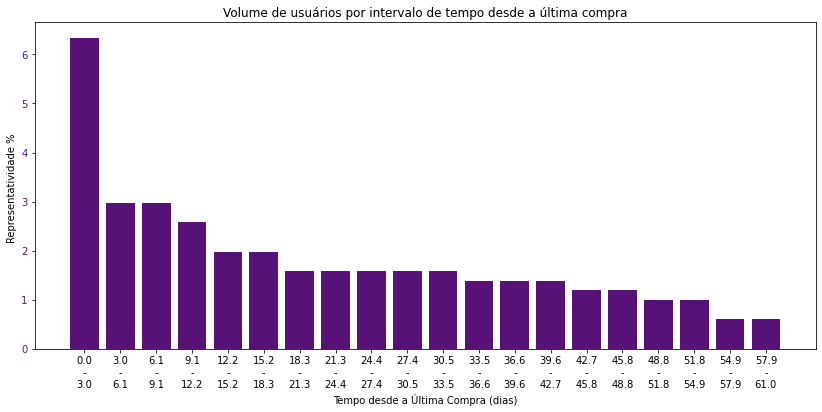

0.0\n-\n3.0      6.336634
6.1\n-\n9.1      2.970297
15.2\n-\n18.3    2.970297
9.1\n-\n12.2     2.574257
12.2\n-\n15.2    1.980198
3.0\n-\n6.1      1.980198
27.4\n-\n30.5    1.584158
54.9\n-\n57.9    1.584158
33.5\n-\n36.6    1.584158
30.5\n-\n33.5    1.584158
18.3\n-\n21.3    1.584158
24.4\n-\n27.4    1.386139
21.3\n-\n24.4    1.386139
51.8\n-\n54.9    1.386139
45.8\n-\n48.8    1.188119
57.9\n-\n61.0    1.188119
39.6\n-\n42.7    0.990099
48.8\n-\n51.8    0.990099
36.6\n-\n39.6    0.594059
42.7\n-\n45.8    0.594059
Name: time_range, dtype: float64


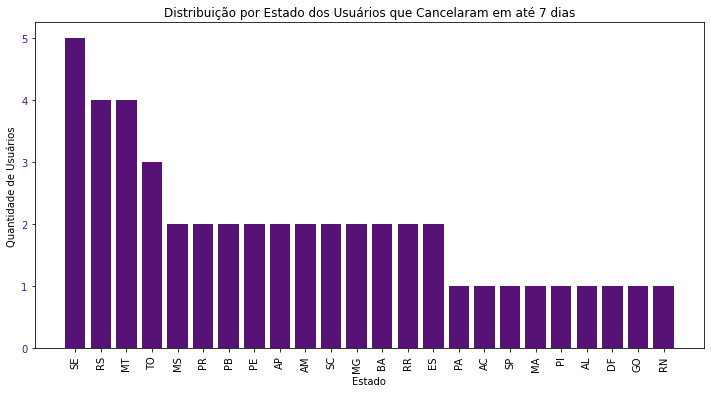

In [11]:


def filter_missing_values(df):
    df = df[pd.notnull(df['last_date_purchase'])]
    df = df[pd.notnull(df['deleted_at'])]
    return df

def calculate_time_since_last_purchase(df):
    df['time_since_last_purchase'] = (df['deleted_at'] - df['last_date_purchase']).dt.days
    return df

def create_time_ranges(df, max_time = "all", num_bins=20):
    min_time = df['time_since_last_purchase'].min()
    
    if(max_time == "all"):
        max_time = df['time_since_last_purchase'].max()

    step = (max_time - min_time + 1) / num_bins
    bins = [round(min_time + step * i, 1) for i in range(num_bins + 1)]
    labels = [f'{bins[i]:.1f}\n-\n{bins[i + 1]:.1f}' for i in range(num_bins)]
    df['time_range'] = pd.cut(df['time_since_last_purchase'], bins=bins, labels=labels, include_lowest=True)
    return df, labels

def calculate_representativity(df):
    time_range_counts = df['time_range'].value_counts()
    total_counts = len(df)
    representativity = time_range_counts / total_counts * 100
    return representativity

def plot_representativity(representativity, labels):
    fig, ax1 = plt.subplots(figsize=(14, 6))
    plt.title('Volume de usuários por intervalo de tempo desde a última compra')
    ax1.set_xlabel('Tempo desde a Última Compra (dias)')
    ax1.set_ylabel('Representatividade % ')
    ax1.bar(labels, representativity.values, color='#571277', label='Representatividade')
    ax1.tick_params(axis='y', labelcolor='#571277')
    plt.show()

def filter_cancelled_within_n_days(df, days):
    df_cancelled_within_n_days = df[(df['status'] == 'canceled') & (df['time_since_last_purchase'] <= days)]
    return df_cancelled_within_n_days

def calculate_state_distribution(df):
    state_counts = df['state'].value_counts()
    return state_counts

def plot_state_distribution(state_counts, days):
    fig, ax2 = plt.subplots(figsize=(12, 6))
    plt.title(f'Distribuição por Estado dos Usuários que Cancelaram em até {days} dias')
    ax2.set_xlabel('Estado')
    ax2.set_ylabel('Quantidade de Usuários')
    ax2.bar(state_counts.index, state_counts.values, color='#571277', label='Quantidade de Usuários')
    ax2.tick_params(axis='x', rotation=90)
    ax2.tick_params(axis='y', labelcolor='#571277')
    plt.show()


df2 = filter_missing_values(df)

# para todo o periodo
df2 = calculate_time_since_last_purchase(df2)
df2, labels = create_time_ranges(df2)

representativity = calculate_representativity(df2)
plot_representativity(representativity, labels)

print(representativity)
# para 60 dias
df2, labels = create_time_ranges(df2, 60)
representativity = calculate_representativity(df2)
plot_representativity(representativity, labels)
print(representativity)



time_since_last_purchase = 7
df_cancelled_within_n_days = filter_cancelled_within_n_days(df2,time_since_last_purchase)

# Calculate state distribution
state_counts = calculate_state_distribution(df_cancelled_within_n_days)

# Plot state distribution
plot_state_distribution(state_counts,time_since_last_purchase)


# Verificando o marketing_source

In [43]:
def generate_vision_table_marketing_source(df):
    filtered_df = df[df['status'].isin(['active', 'paused', 'canceled'])]

    # Agrupar os dados por marketing_source e status e calcular as métricas
    churn_table = filtered_df.groupby(['marketing_source', 'status']).agg(
        volume=('status', 'count')
    ).reset_index()

    churn_table = churn_table.pivot(index='marketing_source', columns='status', values='volume').reset_index()
    churn_table['Total'] = churn_table.sum(axis=1)
    churn_table['% Ativo'] = churn_table['active'] / churn_table['Total'] * 100
    churn_table['% Pausado'] = churn_table['paused'] / churn_table['Total'] * 100
    churn_table['% Cancelado'] = churn_table['canceled'] / churn_table['Total'] * 100

    churn_table = churn_table[['marketing_source', 'active', '% Ativo', 'paused', '% Pausado', 'canceled', '% Cancelado', 'Total']]

    return churn_table

churn_table = generate_vision_table_marketing_source(df)

formatted_table = churn_table.rename(columns={'marketing_source': 'Canal', 'active': 'Ativos', 'paused': 'Pausado', 'canceled': 'Cancelado', 'Total': 'Total'})
formatted_table['% Ativo'] = formatted_table['% Ativo'].map('{:.2f}%'.format)
formatted_table['% Pausado'] = formatted_table['% Pausado'].map('{:.2f}%'.format)
formatted_table['% Cancelado'] = formatted_table['% Cancelado'].map('{:.2f}%'.format)
formatted_table = formatted_table.sort_values('% Cancelado', ascending=False)

display(formatted_table)

status,Canal,Ativos,% Ativo,Pausado,% Pausado,Cancelado,% Cancelado,Total
2,none,439,82.99%,56,10.59%,34,6.43%,529
5,telegram_whatsapp,914,85.58%,88,8.24%,66,6.18%,1068
3,organic_search,3118,84.29%,385,10.41%,196,5.30%,3699
4,paid_search,1307,85.65%,149,9.76%,70,4.59%,1526
1,direct,1872,87.11%,181,8.42%,96,4.47%,2149
0,crm,874,84.94%,112,10.88%,43,4.18%,1029


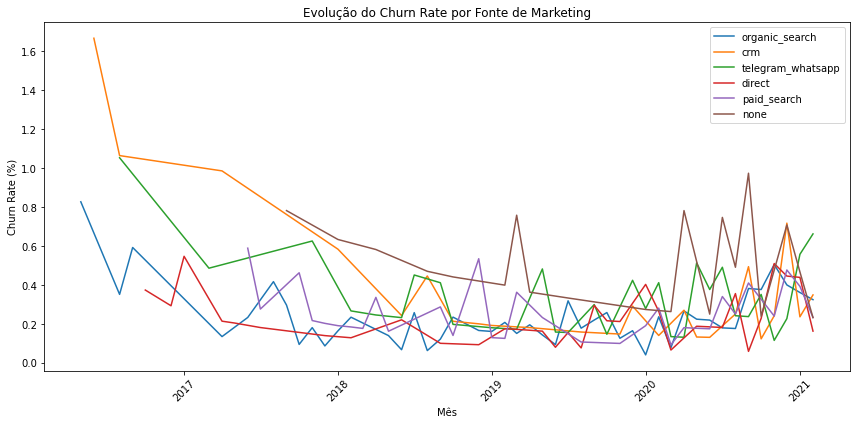

In [46]:
def calculate_total_active_subscribers_monthly_by_marketing_source(df):
    df['created_month'] = df['created_at'].dt.to_period('M')
    df['deleted_month'] = df['deleted_at'].dt.to_period('M')

    active_subscribers = pd.DataFrame()

    for month in df['created_month'].unique():
        monthly_data = df[(df['created_month'] < month) & ((df['status'] == 'active') | (df['deleted_month'] > month))]
        active_by_marketing_source = monthly_data.groupby('marketing_source').size().reset_index(name='total_active_subscribers')
        active_by_marketing_source['Month'] = str(month)
        active_subscribers = pd.concat([active_subscribers, active_by_marketing_source], ignore_index=True)

    return active_subscribers[['Month', 'marketing_source', 'total_active_subscribers']]



def calculate_monthly_churn_by_marketing_source(df_canceled, total_active_subscribers_monthly):
    monthly_churn = pd.DataFrame()

    for month in total_active_subscribers_monthly['Month']:
        canceled_by_marketing_source = df_canceled[df_canceled['deleted_month'] == month].groupby('marketing_source').size().reset_index(name='canceled_count')
        active_by_marketing_source = total_active_subscribers_monthly[total_active_subscribers_monthly['Month'] == month]

        churn_data = pd.merge(canceled_by_marketing_source, active_by_marketing_source, on='marketing_source', how='left')
        churn_data['Churn Rate'] = (churn_data['canceled_count'] / churn_data['total_active_subscribers']) * 100

        monthly_churn = pd.concat([monthly_churn, churn_data], ignore_index=True)
    monthly_churn = monthly_churn.drop_duplicates()

    return monthly_churn[['Month', 'marketing_source', 'Churn Rate', 'canceled_count', 'total_active_subscribers']]

def plot_monthly_churn_by_marketing_source(monthly_churn):
    plt.figure(figsize=(12, 6))
    monthly_churn['Month'] = pd.to_datetime(monthly_churn['Month'], format='%Y-%m')
    monthly_churn = monthly_churn.sort_values('Month')  # Ordenar pelos meses
    marketing_sources = monthly_churn['marketing_source'].unique()
    for source in marketing_sources:
        source_data = monthly_churn[monthly_churn['marketing_source'] == source]
        plt.plot(source_data['Month'], source_data['Churn Rate'], label=source)

    plt.xlabel('Mês')
    plt.ylabel('Churn Rate (%)')
    plt.title('Evolução do Churn Rate por Fonte de Marketing')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()





# Cálculo dos assinantes ativos mensais por fonte de marketing
total_active_subscribers_monthly = calculate_total_active_subscribers_monthly_by_marketing_source(df)

# Cálculo do churn rate mensal por fonte de marketing
monthly_churn = calculate_monthly_churn_by_marketing_source(df_canceled, total_active_subscribers_monthly)

# Plotar o churn rate por fonte de marketing
plot_monthly_churn_by_marketing_source(monthly_churn)



# Ticket médio

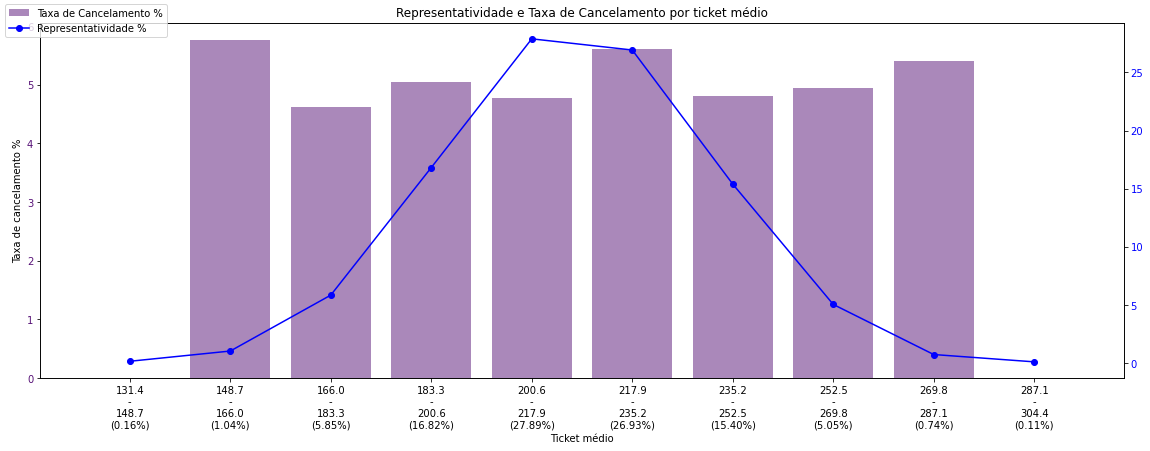

In [48]:


def calculate_avg_ticket_range(df):
    min_ticket = df['average_ticket'].min()
    max_ticket = df['average_ticket'].max()
    step = (max_ticket - min_ticket + 1) / 10
    bins = [round(min_ticket + step * i, 1) for i in range(11)]
    labels = [f'{bins[i]:.1f}\n-\n{bins[i + 1]:.1f}' for i in range(10)]
    df['average_ticket_range'] = pd.cut(df['average_ticket'], bins=bins, labels=labels, include_lowest=True)
    return df, labels

def calculate_representativity(df):
    age_range_counts = df['average_ticket_range'].value_counts()
    representativity = age_range_counts / age_range_counts.sum() * 100
    return representativity


def calculate_churn_by_avg_ticket_range(df):
    churn_by_age_range = df[df['status'] == 'canceled'].groupby('average_ticket_range').size() / df.groupby('average_ticket_range').size()
    return churn_by_age_range * 100

def plot_data(representativity, churn_by_avg_ticket_range, labels):
    churn_by_avg_ticket_range = churn_by_avg_ticket_range.reindex(labels)
    representativity = representativity.reindex(labels)

    fig, ax1 = plt.subplots(figsize=(16, 6))
    ax1.set_ylabel('Taxa de Cancelamento %')
    ax1.bar(churn_by_avg_ticket_range.index, churn_by_avg_ticket_range.values, color='#571277', alpha=0.5, label='Taxa de Cancelamento %')
    ax1.tick_params(axis='y', labelcolor='#571277')
    ax1.set_xlabel('Ticket médio')
    ax1.set_ylabel('Taxa de cancelamento %')

    ax2 = ax1.twinx()
    ax2.plot(representativity.index, representativity.values, color='blue', marker='o', label='Representatividade %')
    ax2.tick_params(axis='y', labelcolor='blue')

    fig.tight_layout()
    fig.legend(loc='upper left')
    plt.title('Representatividade e Taxa de Cancelamento por ticket médio')

    custom_labels = [f'{labels[i]}\n({representativity[i]:.2f}%)' for i in range(len(labels))]
    plt.xticks(range(len(labels)), custom_labels, rotation='vertical', ha='center')

    plt.show()





def calculate_rate_by_ticket_medio(df):
    df, labels = calculate_avg_ticket_range(df)
    representativity = calculate_representativity(df)
    churn_by_avg_ticket_range = calculate_churn_by_avg_ticket_range(df)
    plot_data(representativity, churn_by_avg_ticket_range, labels)



calculate_rate_by_ticket_medio(df)


# Cancelamento por estado

state
AC    3.57
AL    3.53
AM    3.80
AP    3.81
BA    3.68
CE    3.78
DF    3.57
ES    3.52
GO    4.03
MA    3.54
MG    3.73
MS    3.74
MT    3.68
PA    3.51
PB    3.72
PE    3.67
PI    3.38
PR    3.85
RJ    3.77
RN    3.53
RO    3.81
RR    3.96
RS    3.82
SC    3.70
SE    3.67
SP    3.54
TO    4.09
dtype: float64


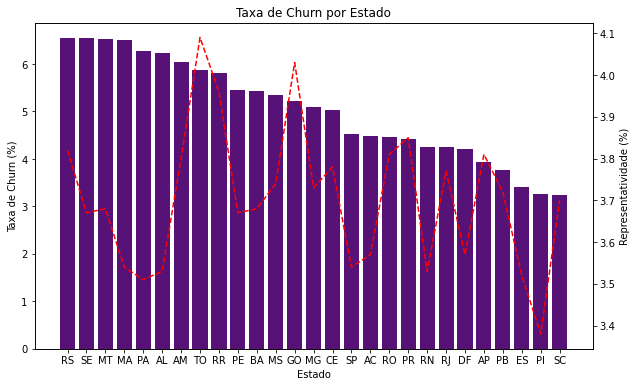

In [50]:

def calculate_churn_rate_by_state(df_canceled, df):
    churn_by_state = (df_canceled.groupby('state').size() / df.groupby('state').size()) * 100
    return churn_by_state

def calculate_representativity(df):
    total_subscribers_by_state = df.groupby('state').size()
    representativity = (total_subscribers_by_state / df.shape[0]) * 100
    return representativity

def create_churn_dataframe(churn_by_state, representativity):
    df_churn = pd.DataFrame({'Churn Rate (%)': churn_by_state, 'Representatividade (%)': representativity})
    df_churn = df_churn.sort_values('Churn Rate (%)', ascending=False)
    return df_churn

def plot_churn_by_state(df_churn):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.bar(df_churn.index, df_churn['Churn Rate (%)'], color='#571277')
    ax1.set_xlabel('Estado')
    ax1.set_ylabel('Taxa de Churn (%)')
    ax1.set_title('Taxa de Churn por Estado')

    ax2 = ax1.twinx()
    ax2.plot(df_churn.index, df_churn['Representatividade (%)'], color='red', linestyle='--')
    ax2.set_ylabel('Representatividade (%)')

    plt.xticks(rotation=45)
    plt.show()

churn_by_state = calculate_churn_rate_by_state(df_canceled, df)
representativity = calculate_representativity(df)
print(representativity)
df_churn = create_churn_dataframe(churn_by_state, representativity)
plot_churn_by_state(df_churn)

# Verificando o recency dos clientes ativos

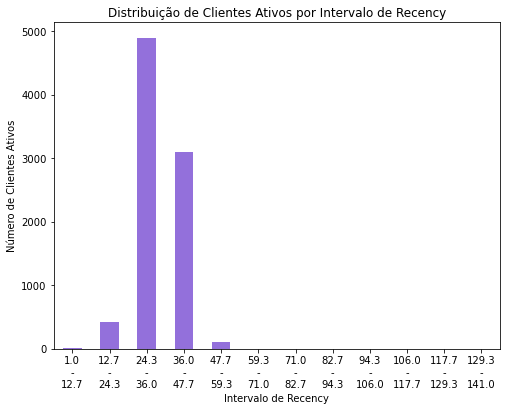

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_recency(df, num_bins):
    min_time = df['recency'].min()
    max_time = 140

    step = (max_time - min_time + 1) / num_bins
    bins = [round(min_time + step * i, 1) for i in range(num_bins + 1)]
    labels = [f'{bins[i]:.1f}\n-\n{bins[i + 1]:.1f}' for i in range(num_bins)]

    df['recency_group'] = pd.cut(df['recency'], bins=bins, labels=labels)

    active_customers = df[df['status'] == 'active']
    recency_counts = active_customers['recency_group'].value_counts().sort_index()

    plt.figure(figsize=(8, 6))
    recency_counts.plot(kind='bar', color='#9370DB')
    plt.xlabel('Intervalo de Recency')
    plt.ylabel('Número de Clientes Ativos')
    plt.title('Distribuição de Clientes Ativos por Intervalo de Recency')
    plt.xticks(rotation=0)
    plt.show()


analyze_recency(df, 12)